In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
#from sklearn.linear_model import LinearRegression
sns.set()

df= pd.read_csv("/home/hieu/Downloads/_data_science__ML_data_minning/intro2ds_capstone_project/combined_file.csv",thousands=',',skipinitialspace=True)
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DienTich          9800 non-null   object 
 1   Phongngu          9800 non-null   object 
 2   PhongTam          6315 non-null   object 
 3   GiayTo            7832 non-null   object 
 4   Loai              9700 non-null   object 
 5   HuongCuaChinh     1290 non-null   object 
 6   TinhTrangNoiThat  4986 non-null   object 
 7   DiaChi            9804 non-null   object 
 8   Gia               9804 non-null   object 
 9   SoTang            7456 non-null   float64
 10  DacDiem           634 non-null    object 
dtypes: float64(1), object(10)
memory usage: 842.7+ KB


In [2]:
df1 = df[df.DienTich.notnull()]
df1 = df1.reset_index()
for i in range(0,len(df1.DienTich)):
    df1.DienTich[i]= df1.DienTich[i].split(' ')[0]

## Em sẽ chỉ lấy những data có dữ liệu về phòng ngủ 
df2 = df1[df1.Phongngu.notnull()]
for i in range(0,len(df2.Phongngu)):
    if 'nhiều hơn' in df2.Phongngu[i]:
        df2.Phongngu[i]= float(df2.Phongngu[i].split(' ')[2])+1
    else:
        df2.Phongngu[i]= df2.Phongngu[i].split(' ')[0]

## Em sẽ chỉ lấy những data có dữ liệu về phòng tắm
df3 = df2[df2.PhongTam.notnull()]
df3 = df3.reset_index()
for i in range(0,len(df3.PhongTam)):
    if 'Nhiều hơn' in df3.PhongTam[i]:
        df3.PhongTam[i]= float(df3.PhongTam[i].split(' ')[2])+1
    else:
        df3.PhongTam[i]= df3.PhongTam[i].split(' ')[0]
        
del df3['level_0']
del df3['index']


df4 = df3[df3.Loai.notnull()]
for i in range(0,len(df4.Gia)):
    if 'GIÁ TỐT' in df4.Gia[i]:
        df4.Gia[i] = df4.Gia[i].split('\n')[0]
    else:
        df4.Gia[i] = df4.Gia[i].split('-')[0]

for i in range(0,len(df4.Gia)):
    if 'tỷ' in df4.Gia[i]:
        price = df4.Gia[i].split(' ')[0]
        price = price.replace(',','.')
        df4.Gia[i] = round(float(price)*1000000000,1)
    elif 'triệu' in df4.Gia[i] :
        price = df4.Gia[i].split(' ')[0]
        price = price.replace(',','.')
        df4.Gia[i] = round(float(price)*1000000,1)

KeyError: 22

In [3]:
df1 = df[df.DienTich.notnull()]
df1 = df1.reset_index()
for i in range(0,len(df1.DienTich)):
    df1.DienTich[i]= df1.DienTich[i].split(' ')[0]

## Em sẽ chỉ lấy những data có dữ liệu về phòng ngủ 
df2 = df1[df1.Phongngu.notnull()]
for i in range(0,len(df2.Phongngu)):
    if 'nhiều hơn' in df2.Phongngu[i]:
        df2.Phongngu[i]= float(df2.Phongngu[i].split(' ')[2])+1
    else:
        df2.Phongngu[i]= df2.Phongngu[i].split(' ')[0]

## Em sẽ chỉ lấy những data có dữ liệu về phòng tắm
df3 = df2[df2.PhongTam.notnull()]
df3 = df3.reset_index()
for i in range(0,len(df3.PhongTam)):
    if 'Nhiều hơn' in df3.PhongTam[i]:
        df3.PhongTam[i]= float(df3.PhongTam[i].split(' ')[2])+1
    else:
        df3.PhongTam[i]= df3.PhongTam[i].split(' ')[0]
        
del df3['level_0']
del df3['index']


df4 = df3[df3.Loai.notnull()]


In [4]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6224 entries, 0 to 6314
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DienTich          6224 non-null   object 
 1   Phongngu          6224 non-null   object 
 2   PhongTam          6224 non-null   object 
 3   GiayTo            5649 non-null   object 
 4   Loai              6224 non-null   object 
 5   HuongCuaChinh     1087 non-null   object 
 6   TinhTrangNoiThat  3857 non-null   object 
 7   DiaChi            6224 non-null   object 
 8   Gia               6224 non-null   object 
 9   SoTang            5597 non-null   float64
 10  DacDiem           165 non-null    object 
dtypes: float64(1), object(10)
memory usage: 583.5+ KB


In [5]:
for i in range(0,len(df4.Gia)):
    if 'GIÁ TỐT' in df4.Gia[i]:
        df4.Gia[i] = df4.Gia[i].split('\n')[0]
    else:
        df4.Gia[i] = df4.Gia[i].split('-')[0]

KeyError: 22

2,95 tỷ 
4,95 tỷ 
6,65 tỷ 
4,7 tỷ 
4,3 tỷ 
7,8 tỷ 
4,2 tỷ 
6,35 tỷ 
15,8 tỷ 
5,9 tỷ 
6,2 tỷ 
3,95 tỷ 
4 tỷ 
10,9 tỷ 
8,65 tỷ 
5,12 tỷ 
2,3 tỷ 
2,55 tỷ 
2,55 tỷ 
2,99 tỷ 
2,45 tỷ 
1,8 tỷ 


KeyError: 22

In [7]:
print(df4.Gia)

0              2,95 tỷ 
1              4,95 tỷ 
2              6,65 tỷ 
3               4,7 tỷ 
4               4,3 tỷ 
             ...       
6310    5,15 tỷ - 32 m2
6311    3,55 tỷ - 40 m2
6312     5,1 tỷ - 60 m2
6313    2,69 tỷ - 35 m2
6314       8 tỷ - 43 m2
Name: Gia, Length: 6224, dtype: object


In [10]:
print(df4.Gia[23])

6,95 tỷ - 100 m2


In [14]:
df4[22]

KeyError: 22

In [18]:
print(df4.iloc[23])

DienTich                                                           33
Phongngu                                                            4
PhongTam                                                            3
GiayTo                                                       Đã có sổ
Loai                                                     Nhà ngõ, hẻm
HuongCuaChinh                                                     NaN
TinhTrangNoiThat                                      Nội thất đầy đủ
DiaChi              Hòa Bình, Phường Biên Giang, Quận Hà Đông, Hà ...
Gia                                                    2,4 tỷ - 33 m2
SoTang                                                            4.0
DacDiem                                                           NaN
Name: 24, dtype: object


In [19]:
print(df4.Gia[21])

1,8 tỷ 


In [20]:
print(df4.Gia[22])

KeyError: 22

In [22]:
print(df4.iloc[21])

DienTich                                                           30
Phongngu                                                            3
PhongTam                                                            3
GiayTo                                                            NaN
Loai                                                     Nhà ngõ, hẻm
HuongCuaChinh                                                 Tây Nam
TinhTrangNoiThat                                      Nội thất đầy đủ
DiaChi              65, An Thắng, Phường Biên Giang, Quận Hà Đông,...
Gia                                                           1,8 tỷ 
SoTang                                                            NaN
DacDiem                                             Hẻm xe hơi,Nở hậu
Name: 21, dtype: object


In [23]:
print(df4['Gia'])

0              2,95 tỷ 
1              4,95 tỷ 
2              6,65 tỷ 
3               4,7 tỷ 
4               4,3 tỷ 
             ...       
6310    5,15 tỷ - 32 m2
6311    3,55 tỷ - 40 m2
6312     5,1 tỷ - 60 m2
6313    2,69 tỷ - 35 m2
6314       8 tỷ - 43 m2
Name: Gia, Length: 6224, dtype: object


In [24]:
print(df4['Gia'][0])

2,95 tỷ 


In [25]:
print(df4['Gia'][22])

KeyError: 22

In [26]:
print(df4['Gia'].iloc[22])


6,95 tỷ - 100 m2


In [27]:
for i in range(0,len(df4.Gia)):
    if 'GIÁ TỐT' in df4.Gia.iloc[i]:
        df4.Gia.iloc[i] = df4.Gia.iloc[i].split('\n')[0]
    else:
        df4.Gia.iloc[i] = df4.Gia.iloc[i].split('-')[0]

In [29]:
print(df4.Gia)

0       2,95 tỷ 
1       4,95 tỷ 
2       6,65 tỷ 
3        4,7 tỷ 
4        4,3 tỷ 
          ...   
6310    5,15 tỷ 
6311    3,55 tỷ 
6312     5,1 tỷ 
6313    2,69 tỷ 
6314       8 tỷ 
Name: Gia, Length: 6224, dtype: object


In [30]:
print(df4)

     DienTich Phongngu PhongTam    GiayTo                   Loai  \
0          36        4        4  Đã có sổ           Nhà ngõ, hẻm   
1          36        3        4  Đã có sổ           Nhà ngõ, hẻm   
2          35        3        4  Đã có sổ           Nhà ngõ, hẻm   
3          39        4        5  Đã có sổ           Nhà ngõ, hẻm   
4          33        3        4  Đã có sổ           Nhà ngõ, hẻm   
...       ...      ...      ...       ...                    ...   
6310       32        5        3  Đã có sổ  Nhà mặt phố, mặt tiền   
6311       40        4        3  Đã có sổ           Nhà ngõ, hẻm   
6312       60        4        3  Đã có sổ           Nhà ngõ, hẻm   
6313       35        5        3  Đã có sổ           Nhà ngõ, hẻm   
6314       43        9      7.0  Đã có sổ  Nhà mặt phố, mặt tiền   

     HuongCuaChinh  TinhTrangNoiThat  \
0         Đông Nam               NaN   
1              NaN  Nội thất cao cấp   
2              NaN   Nội thất đầy đủ   
3              NaN   Nộ

In [31]:
for i in range(0,len(df4.Gia)):
    if 'tỷ' in df4.Gia[i]:
        price = df4.Gia[i].split(' ')[0]
        price = price.replace(',','.')
        df4.Gia[i] = round(float(price)*1000000000,1)
    elif 'triệu' in df4.Gia[i] :
        price = df4.Gia[i].split(' ')[0]
        price = price.replace(',','.')
        df4.Gia[i] = round(float(price)*1000000,1)
df4 = df4.reset_index()

KeyError: 22

In [32]:
for i in range(0,len(df4.Gia)):
    if 'tỷ' in df4.Gia.iloc[i]:
        price = df4.Gia.iloc[i].split(' ')[0]
        price = price.replace(',','.')
        df4.Gia[i] = round(float(price)*1000000000,1)
    elif 'triệu' in df4.Gia.iloc[i] :
        price = df4.Gia.iloc[i].split(' ')[0]
        price = price.replace(',','.')
        df4.Gia.iloc[i] = round(float(price)*1000000,1)
df4 = df4.reset_index()

TypeError: argument of type 'float' is not iterable

In [33]:
print(len(df4.Gia))

6224


In [34]:
for i in range(len(df4.Gia)):
    if isinstance(df4.Gia.iloc[i], str) and 'tỷ' in df4.Gia.iloc[i]:
        price = df4.Gia.iloc[i].split(' ')[0]
        price = price.replace(',', '.')
        df4.Gia.iloc[i] = round(float(price) * 1000000000, 1)
    elif isinstance(df4.Gia.iloc[i], str) and 'triệu' in df4.Gia.iloc[i]:
        price = df4.Gia.iloc[i].split(' ')[0]
        price = price.replace(',', '.')
        df4.Gia.iloc[i] = round(float(price) * 1000000, 1)

df4 = df4.reset_index()

In [35]:
print(df4.Gia)

0       2950000000.0
1       4950000000.0
2       6650000000.0
3       4700000000.0
4       4300000000.0
            ...     
6219    5150000000.0
6220    3550000000.0
6221    5100000000.0
6222    2690000000.0
6223    8000000000.0
Name: Gia, Length: 6224, dtype: object


In [36]:
df4['Quan'] = df.DiaChi.copy()
for i in range(0,len(df4.DiaChi)):
    a= df4.DiaChi[i].split(',')
    df4['Quan'][i] = a[len(a)-2]
for i in df4['Quan']:
    if 'Quận' not in i and 'Huyện' not in i:
        df4 = df4.drop(df4[df4['Quan']==i].index)

In [37]:
df4.Quan.unique()


array([' Quận Nam Từ Liêm', ' Quận Ba Đình', ' Quận Đống Đa',
       ' Quận Cầu Giấy', ' Quận Tây Hồ', ' Quận Hoàng Mai',
       ' Quận Thanh Xuân', ' Quận Hà Đông', ' Quận Hai Bà Trưng',
       ' Quận Long Biên', ' Huyện Hoài Đức', ' Huyện Gia Lâm',
       ' Quận Bắc Từ Liêm', ' Huyện Thanh Trì', ' Quận Hoàn Kiếm',
       ' Huyện Đông Anh', ' Huyện Thanh Oai', ' Huyện Thạch Thất',
       ' Huyện Đan Phượng', ' Huyện Thường Tín', ' Huyện Quốc Oai',
       ' Huyện Chương Mỹ', ' Huyện Sóc Sơn', ' Huyện Mê Linh'],
      dtype=object)

In [38]:
print(df4)

      index DienTich Phongngu PhongTam    GiayTo                   Loai  \
0         0       36        4        4  Đã có sổ           Nhà ngõ, hẻm   
1         1       36        3        4  Đã có sổ           Nhà ngõ, hẻm   
2         2       35        3        4  Đã có sổ           Nhà ngõ, hẻm   
3         3       39        4        5  Đã có sổ           Nhà ngõ, hẻm   
4         4       33        3        4  Đã có sổ           Nhà ngõ, hẻm   
...     ...      ...      ...      ...       ...                    ...   
6219   6310       32        5        3  Đã có sổ  Nhà mặt phố, mặt tiền   
6220   6311       40        4        3  Đã có sổ           Nhà ngõ, hẻm   
6221   6312       60        4        3  Đã có sổ           Nhà ngõ, hẻm   
6222   6313       35        5        3  Đã có sổ           Nhà ngõ, hẻm   
6223   6314       43        9      7.0  Đã có sổ  Nhà mặt phố, mặt tiền   

     HuongCuaChinh  TinhTrangNoiThat  \
0         Đông Nam               NaN   
1              NaN 

In [39]:
frame = df4[['DienTich', 'Phongngu', 'PhongTam', 'GiayTo', 'Loai', 'HuongCuaChinh', 'TinhTrangNoiThat', 'DiaChi', 'Gia', 'SoTang','DacDiem', 'Quan'   ]]
frame.head(2)

,DienTich,Phongngu,PhongTam,GiayTo,Loai,HuongCuaChinh,TinhTrangNoiThat,DiaChi,Gia,SoTang,DacDiem,Quan
0,36,4,4,Đã có sổ,"Nhà ngõ, hẻm",Đông Nam,NaN,"Vân Canh, Phường Phương Canh, Quận Nam Từ Liêm...",2950000000.0,4.0,NaN,Quận Nam Từ Liêm
1,36,3,4,Đã có sổ,"Nhà ngõ, hẻm",NaN,Nội thất cao cấp,"Phố Ngọc Hà, Phường Ngọc Hà, Quận Ba Đình, Hà ...",4950000000.0,5.0,NaN,Quận Ba Đình


In [40]:
frame.DienTich = frame.DienTich.astype('float')
frame.Phongngu = frame.Phongngu.astype('float') 
frame.PhongTam = frame.PhongTam.astype('float') 
frame.Gia = frame.Gia.astype('float') 
frame.describe()

,DienTich,Phongngu,PhongTam,Gia,SoTang
count,6221.000000,6221.000000,6221.000000,6.221000e+03,5594.000000
mean,51.145460,4.069764,3.913840,8.012099e+09,5.033429
std,42.740515,1.774313,1.293803,1.433323e+10,8.264737
min,5.000000,1.000000,1.000000,4.100000e+06,1.000000
25%,35.000000,3.000000,3.000000,3.600000e+09,4.000000
50%,41.000000,4.000000,4.000000,5.000000e+09,5.000000
75%,54.000000,4.000000,4.000000,7.850000e+09,5.000000
max,1200.000000,11.000000,7.000000,4.560000e+11,532.000000


In [41]:
frame['USD'] = round(frame['Gia']/24000,0)
rows  = frame[frame.DienTich > 500]
frame = frame.drop(index = rows.index)
rows  = frame[frame.SoTang > 81]
frame = frame.drop(index = rows.index)
frame['log_price'] = np.log(frame.USD)

print("The number of row after cleaning data:",len(frame))

The number of row after cleaning data: 6211


In [42]:
frame.to_csv('/home/hieu/Downloads/_data_science__ML_data_minning/intro2ds_capstone_project/dataset.csv',encoding="utf-8-sig",index=False)

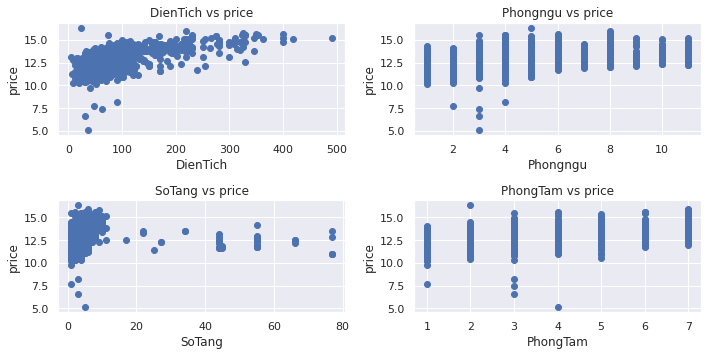

In [58]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(frame[x],frame['log_price'])
    plt.title(x+' vs price')
    plt.ylabel('price')
    plt.xlabel(x)


plt.figure(figsize=(10,12))

scatter('DienTich', 1)
scatter('Phongngu', 2)
scatter('SoTang', 3)
scatter('PhongTam', 4)

plt.tight_layout()

In [44]:
frame1 = frame[['DienTich', 'Phongngu', 'PhongTam', 'GiayTo', 'Loai', 'HuongCuaChinh', 'TinhTrangNoiThat', 'DiaChi', 'Gia', 'SoTang','DacDiem', 'Quan'   ]]

In [45]:
bins = [42,67917,106250,40833333]


In [54]:
def Analyst(col):
    temp = frame1.copy()
    table = temp.groupby([col])['USD'].mean()
    temp = temp.merge(table.reset_index(), how='left',on=col)
    cars_bin=['low','Medium','High']
    frame1['range'] = pd.cut(temp['USD_y'],bins,right=False,labels=cars_bin)
    plt.rcParams['figure.figsize'] = (18, 8)
    df = pd.DataFrame(frame1.groupby([col,'range'])['USD'].mean().unstack(fill_value=0))
    df.plot.bar()
    plt.title('%s vs Price' % col)
    plt.show()

In [48]:
print(frame1)

      DienTich  Phongngu  PhongTam    GiayTo                   Loai  \
0         36.0       4.0       4.0  Đã có sổ           Nhà ngõ, hẻm   
1         36.0       3.0       4.0  Đã có sổ           Nhà ngõ, hẻm   
2         35.0       3.0       4.0  Đã có sổ           Nhà ngõ, hẻm   
3         39.0       4.0       5.0  Đã có sổ           Nhà ngõ, hẻm   
4         33.0       3.0       4.0  Đã có sổ           Nhà ngõ, hẻm   
...        ...       ...       ...       ...                    ...   
6219      32.0       5.0       3.0  Đã có sổ  Nhà mặt phố, mặt tiền   
6220      40.0       4.0       3.0  Đã có sổ           Nhà ngõ, hẻm   
6221      60.0       4.0       3.0  Đã có sổ           Nhà ngõ, hẻm   
6222      35.0       5.0       3.0  Đã có sổ           Nhà ngõ, hẻm   
6223      43.0       9.0       7.0  Đã có sổ  Nhà mặt phố, mặt tiền   

     HuongCuaChinh  TinhTrangNoiThat  \
0         Đông Nam               NaN   
1              NaN  Nội thất cao cấp   
2              NaN   Nội th

In [49]:
frame1 = frame[['DienTich', 'Phongngu', 'PhongTam', 'GiayTo', 'Loai', 'HuongCuaChinh', 'TinhTrangNoiThat', 'DiaChi', 'Gia', 'SoTang','DacDiem', 'Quan', 'USD'   ]]

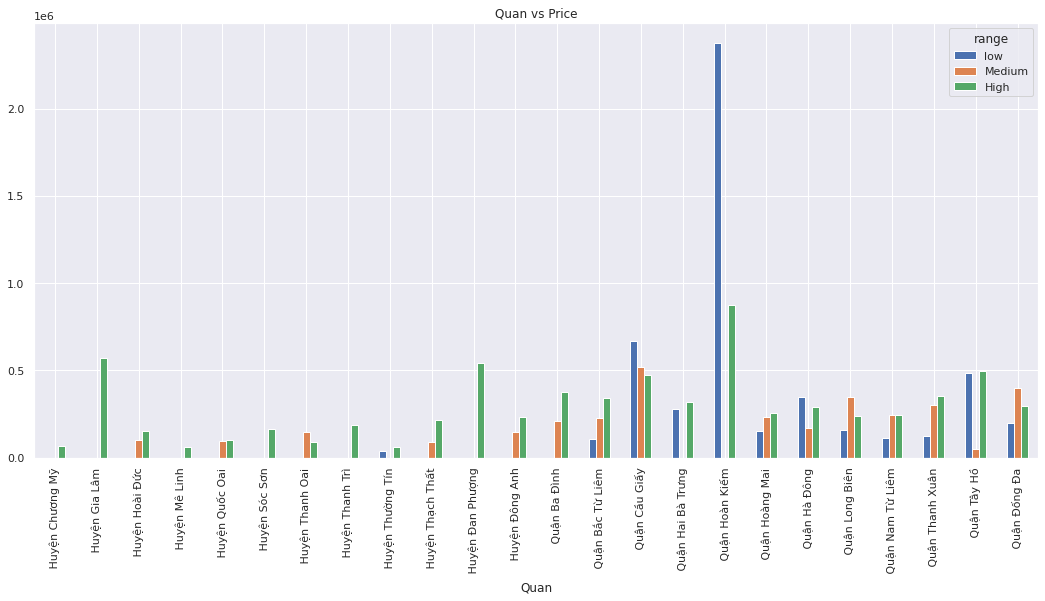

In [59]:
Analyst('Quan')


In [51]:
Analyst('TinhTrangBDS')


KeyError: 'TinhTrangBDS'

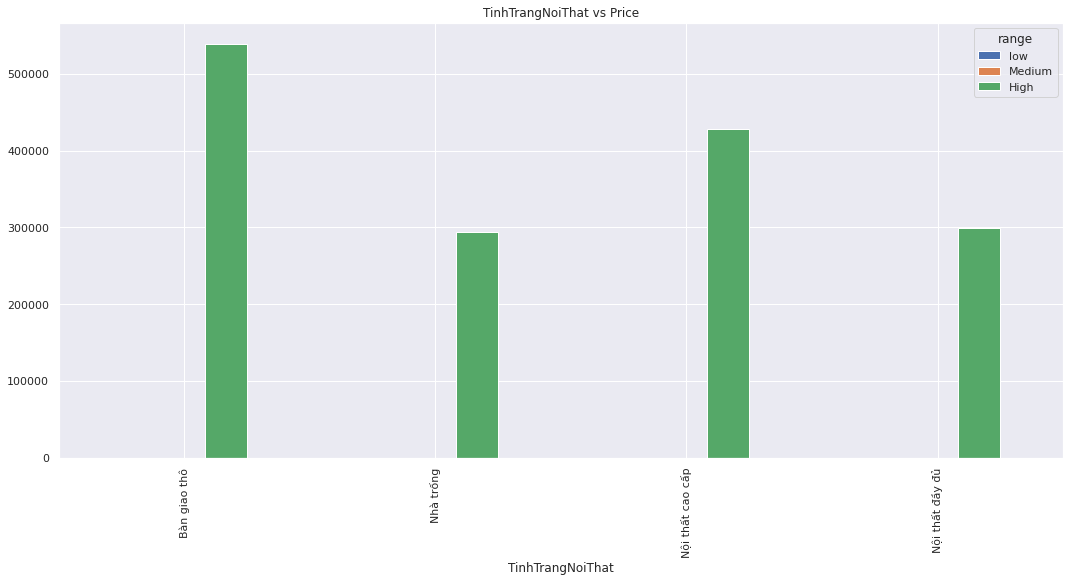

In [60]:
Analyst('TinhTrangNoiThat')


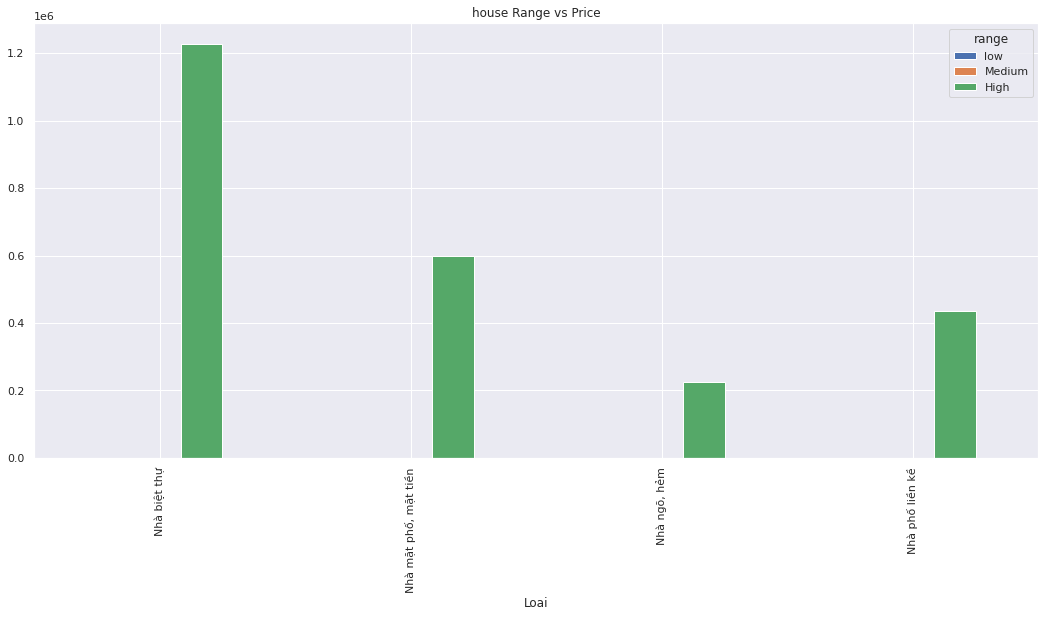

In [53]:
Analyst('Loai')


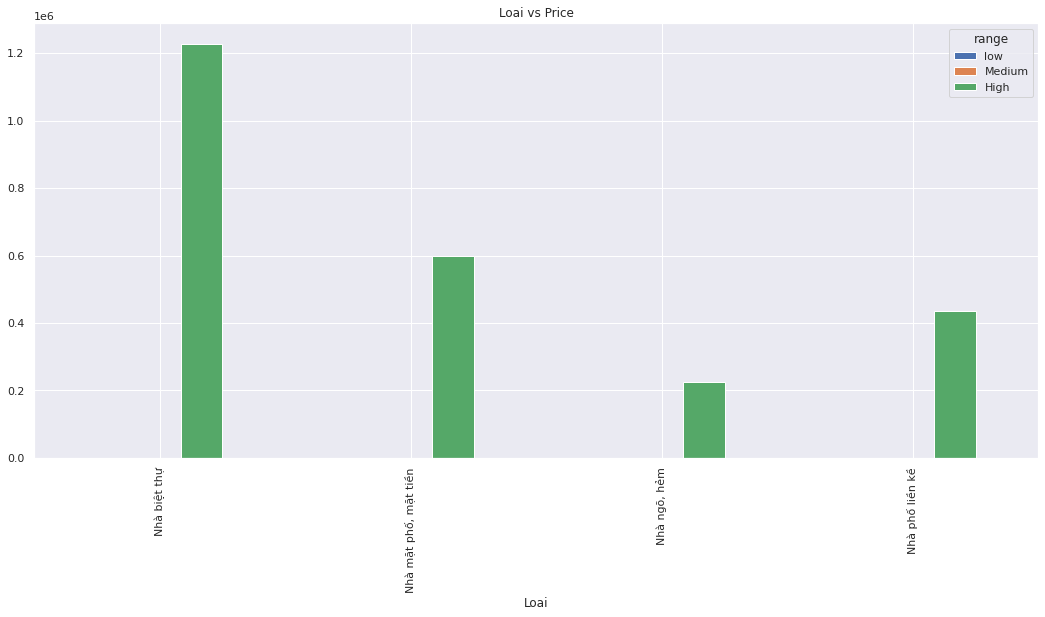

In [55]:
Analyst('Loai')


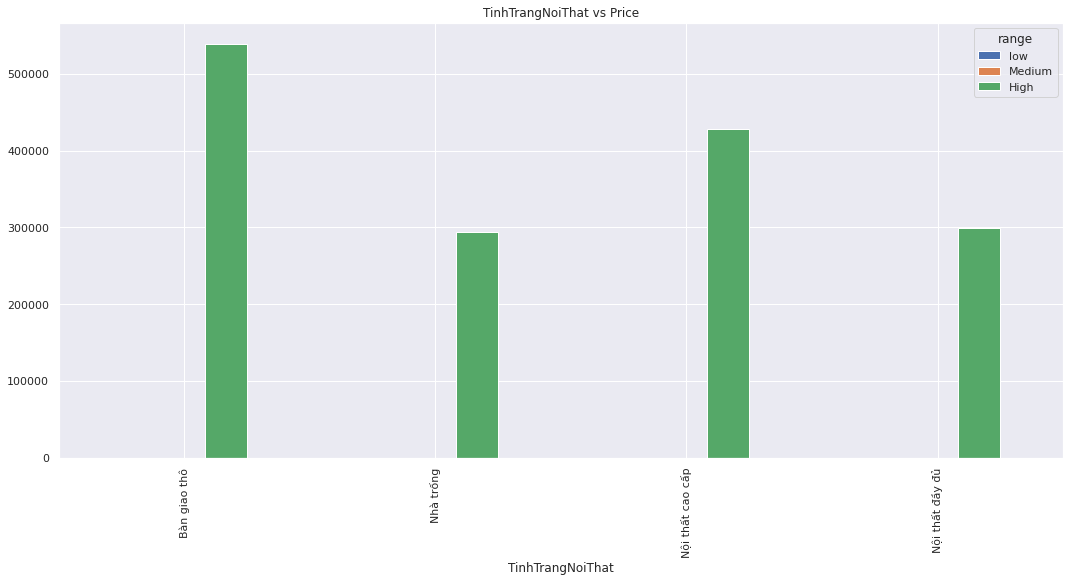

In [56]:
Analyst('TinhTrangNoiThat')


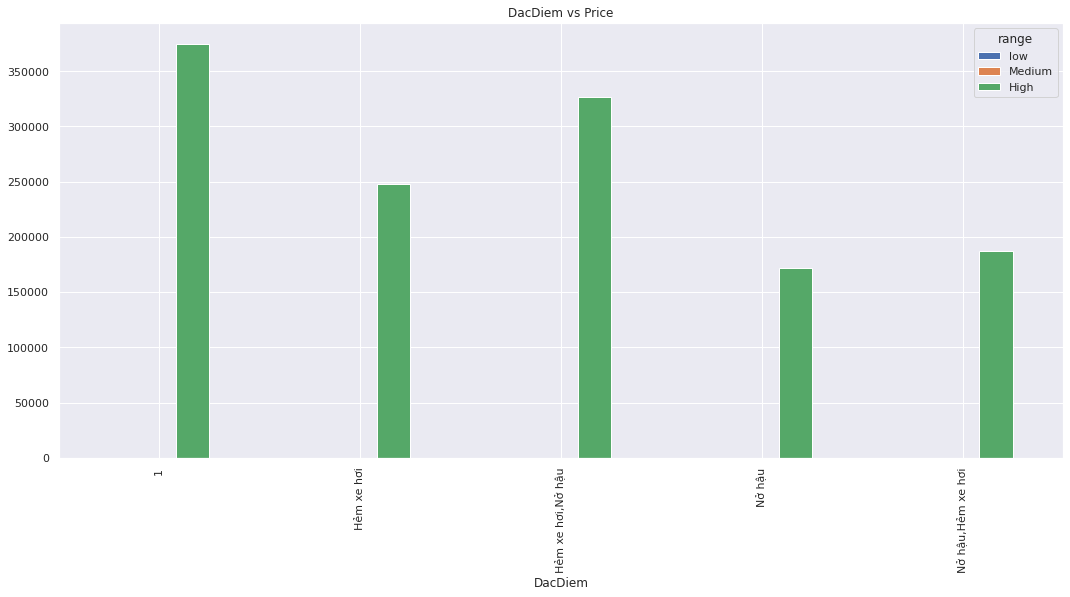

In [57]:
Analyst('DacDiem')

In [61]:
print(test.HuongCuaChinh.value_counts())
sns.boxplot(x=test.HuongCuaChinh, y=test.USD, palette=("plasma"))
plt.title('Huong cua chinh vs Gia')
plt.show()

NameError: name 'test' is not defined

In [62]:
test = frame1[frame1.USD <frame1.USD.quantile(0.8)]


In [63]:
plt.rcParams['figure.figsize'] = (12, 6)

HuongCuaChinh
Đông Nam    287
Đông Bắc    119
Tây Bắc     112
Tây Nam      98
Nam          81
Đông         67
Tây          62
Bắc          61
Name: count, dtype: int64


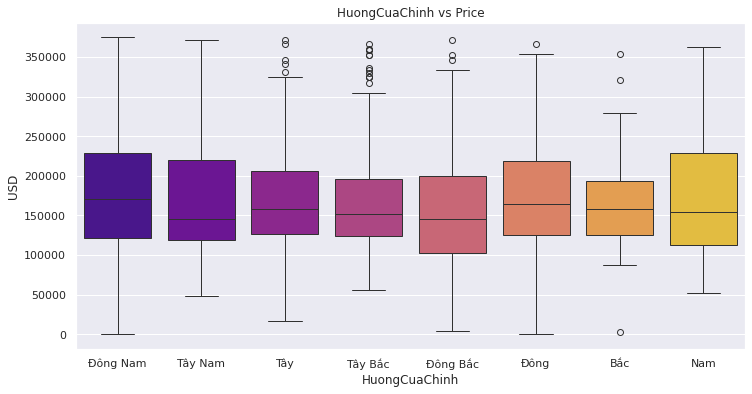

In [65]:
print(test.HuongCuaChinh.value_counts())
sns.boxplot(x=test.HuongCuaChinh, y=test.USD, palette=("plasma"))
plt.title('HuongCuaChinh vs Price')
plt.show()

Loai
Nhà ngõ, hẻm             4199
Nhà mặt phố, mặt tiền     617
Nhà phố liền kề           126
Nhà biệt thự               15
Name: count, dtype: int64


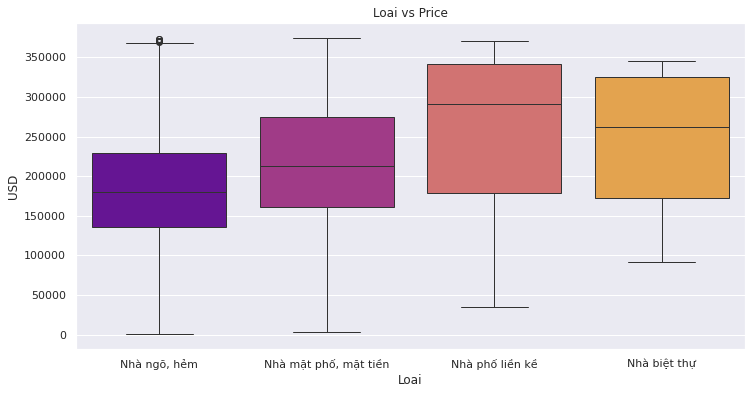

In [67]:
print(test.Loai.value_counts())
sns.boxplot(x=test.Loai, y=test.USD, palette=("plasma"))
plt.title('Loai vs Price')
plt.show()

GiayTo
Đã có sổ        4425
Giấy tờ khác      57
Đang chờ sổ       33
Name: count, dtype: int64


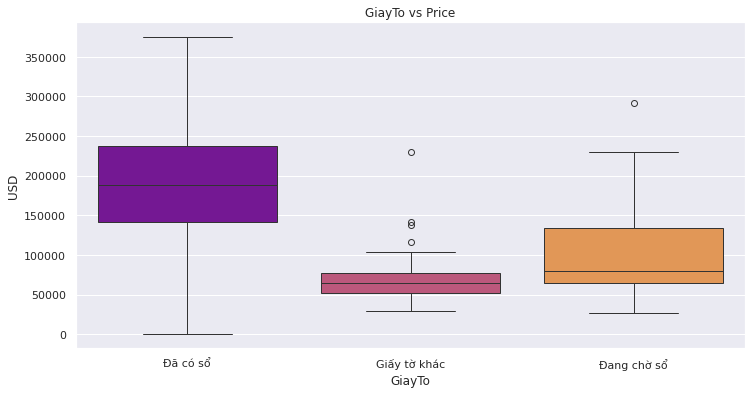

In [69]:
print(test.GiayTo.value_counts())
sns.boxplot(x=test.GiayTo, y=test.USD, palette=("plasma"))
plt.title('GiayTo vs Price')
plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [71]:
df = pd.read_csv('dataset.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

In [72]:
frame.to_csv('dataset.csv',encoding="utf-8-sig",index=False)


In [73]:
df = pd.read_csv('dataset.csv')


In [74]:
df.describe()


,DienTich,Phongngu,PhongTam,Gia,SoTang,USD,log_price
count,6211.000000,6211.000000,6211.000000,6.211000e+03,5587.000000,6.211000e+03,6211.000000
mean,50.279811,4.065368,3.911125,7.750960e+09,4.924110,3.229567e+05,12.353703
std,34.637742,1.768095,1.290804,1.123248e+10,4.174364,4.680200e+05,0.717645
min,5.000000,1.000000,1.000000,4.100000e+06,1.000000,1.710000e+02,5.141664
25%,35.000000,3.000000,3.000000,3.600000e+09,4.000000,1.500000e+05,11.918391
50%,41.000000,4.000000,4.000000,5.000000e+09,5.000000,2.083330e+05,12.246893
75%,54.000000,4.000000,4.000000,7.800000e+09,5.000000,3.250000e+05,12.691580
max,492.000000,11.000000,7.000000,2.950000e+11,77.000000,1.229167e+07,16.324432


In [75]:
df['Rank'] = df.USD.copy()
df_1 = df[df['USD'] < 50000]
df_2 = df[(df['USD'] >= 50000) & (df['USD'] < 100000)]
df_3 = df[(df['USD'] >= 100000) & (df['USD'] < 150000)]
df_4 = df[df['USD'] >= 150000]
df_2.head(2)

,DienTich,Phongngu,PhongTam,GiayTo,Loai,HuongCuaChinh,TinhTrangNoiThat,DiaChi,Gia,SoTang,DacDiem,Quan,USD,log_price,Rank
16,33.0,3.0,3.0,Đã có sổ,"Nhà ngõ, hẻm",Đông Nam,NaN,"Trinh Lương, Phường Phú Lương, Quận Hà Đông, H...",2.300000e+09,4.0,NaN,Quận Hà Đông,95833.0,11.470362,95833.0
21,30.0,3.0,3.0,NaN,"Nhà ngõ, hẻm",Tây Nam,Nội thất đầy đủ,"65, An Thắng, Phường Biên Giang, Quận Hà Đông,...",1.800000e+09,NaN,"Hẻm xe hơi,Nở hậu",Quận Hà Đông,75000.0,11.225243,75000.0


In [76]:
nan_values = df.isna()
nan_columns = nan_values.any()
columns_with_nan = df.columns[nan_columns].tolist()
columns_with_nan

['GiayTo', 'HuongCuaChinh', 'TinhTrangNoiThat', 'SoTang', 'DacDiem']

In [77]:
df.isna().sum()/df.shape[0]*100

DienTich             0.000000
Phongngu             0.000000
PhongTam             0.000000
GiayTo               9.209467
Loai                 0.000000
HuongCuaChinh       82.547094
TinhTrangNoiThat    38.013202
DiaChi               0.000000
Gia                  0.000000
SoTang              10.046691
DacDiem             97.375624
Quan                 0.000000
USD                  0.000000
log_price            0.000000
Rank                 0.000000
dtype: float64

In [78]:
per = 0.5 # Chọn xóa những cột dữ liệu có trên 50% data là NaN

In [79]:
df_dropped = df.dropna(axis=1,thresh=int(df.shape[0]*per))
df_dropped_2 = df_dropped.dropna(how='any')
#df_dropped_2 = df_dropped.dropna(axis=0,thresh=int(df.shape[1]*0.5))
df_dropped_2

,DienTich,Phongngu,PhongTam,GiayTo,Loai,TinhTrangNoiThat,DiaChi,Gia,SoTang,Quan,USD,log_price,Rank
1,36.0,3.0,4.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất cao cấp,"Phố Ngọc Hà, Phường Ngọc Hà, Quận Ba Đình, Hà ...",4.950000e+09,5.0,Quận Ba Đình,206250.0,12.236844,206250.0
3,39.0,4.0,5.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất đầy đủ,"Trần Quốc Vượng, Phường Dịch Vọng Hậu, Quận Cầ...",4.700000e+09,4.0,Quận Cầu Giấy,195833.0,12.185018,195833.0
4,33.0,3.0,4.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất cao cấp,"Ngõ 322 Đường Mỹ Đình, Phường Mỹ Đình 1, Quận ...",4.300000e+09,5.0,Quận Nam Từ Liêm,179167.0,12.096074,179167.0
6,47.0,3.0,3.0,Đã có sổ,"Nhà ngõ, hẻm",Bàn giao thô,"Âu Cơ, Phường Tứ Liên, Quận Tây Hồ, Hà NộiXem ...",4.200000e+09,3.0,Quận Tây Hồ,175000.0,12.072541,175000.0
7,28.0,3.0,4.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất cao cấp,"Phố Tân Mai, Phường Tương Mai, Quận Hoàng Mai,...",6.350000e+09,5.0,Quận Hoàng Mai,264583.0,12.485910,264583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6204,42.0,4.0,4.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất đầy đủ,"Phố Hồ Đắc Di, Phường Nam Đồng, Quận Đống Đa, ...",6.800000e+09,5.0,Quận Đống Đa,283333.0,12.554378,283333.0
6205,28.0,3.0,4.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất đầy đủ,"Hoang Quốc Việt, Phường Nghĩa Đô, Quận Cầu Giấ...",3.650000e+09,4.0,Quận Cầu Giấy,152083.0,11.932182,152083.0
6206,32.0,5.0,3.0,Đã có sổ,"Nhà mặt phố, mặt tiền",Nội thất đầy đủ,"Vũ Trọng Phụng, Phường Thanh Xuân Trung, Quận ...",5.150000e+09,4.0,Quận Thanh Xuân,214583.0,12.276452,214583.0
6208,60.0,4.0,3.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất đầy đủ,"Đội Cấn, Phường Đội Cấn, Quận Ba Đình, Hà NộiX...",5.100000e+09,5.0,Quận Ba Đình,212500.0,12.266697,212500.0


In [80]:
df_x = df_dropped_2.iloc[:, 1:9]
df_x = df_x.drop(df_x.columns[[5, 6]], axis=1)
df_x

,Phongngu,PhongTam,GiayTo,Loai,TinhTrangNoiThat,SoTang
1,3.0,4.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất cao cấp,5.0
3,4.0,5.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất đầy đủ,4.0
4,3.0,4.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất cao cấp,5.0
6,3.0,3.0,Đã có sổ,"Nhà ngõ, hẻm",Bàn giao thô,3.0
7,3.0,4.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất cao cấp,5.0
...,...,...,...,...,...,...
6204,4.0,4.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất đầy đủ,5.0
6205,3.0,4.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất đầy đủ,4.0
6206,5.0,3.0,Đã có sổ,"Nhà mặt phố, mặt tiền",Nội thất đầy đủ,4.0
6208,4.0,3.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất đầy đủ,5.0


In [84]:
df_x = df_dropped_2.iloc[:, 0:10]
df_x = df_x.drop(df_x.columns[[6, 7]], axis=1)
df_x

,DienTich,Phongngu,PhongTam,GiayTo,Loai,TinhTrangNoiThat,SoTang,Quan
1,36.0,3.0,4.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất cao cấp,5.0,Quận Ba Đình
3,39.0,4.0,5.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất đầy đủ,4.0,Quận Cầu Giấy
4,33.0,3.0,4.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất cao cấp,5.0,Quận Nam Từ Liêm
6,47.0,3.0,3.0,Đã có sổ,"Nhà ngõ, hẻm",Bàn giao thô,3.0,Quận Tây Hồ
7,28.0,3.0,4.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất cao cấp,5.0,Quận Hoàng Mai
...,...,...,...,...,...,...,...,...
6204,42.0,4.0,4.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất đầy đủ,5.0,Quận Đống Đa
6205,28.0,3.0,4.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất đầy đủ,4.0,Quận Cầu Giấy
6206,32.0,5.0,3.0,Đã có sổ,"Nhà mặt phố, mặt tiền",Nội thất đầy đủ,4.0,Quận Thanh Xuân
6208,60.0,4.0,3.0,Đã có sổ,"Nhà ngõ, hẻm",Nội thất đầy đủ,5.0,Quận Ba Đình


In [85]:
df_y = df_dropped_2.iloc[:, 10]
df_y

1       206250.0
3       195833.0
4       179167.0
6       175000.0
7       264583.0
          ...   
6204    283333.0
6205    152083.0
6206    214583.0
6208    212500.0
6210    333333.0
Name: USD, Length: 3504, dtype: float64

In [86]:
data_dummies = pd.get_dummies(df_x, drop_first=True)
data_dummies = data_dummies.astype(float)
cols = data_dummies.columns.values
data_preprocessed = data_dummies[cols]
data_preprocessed

,DienTich,Phongngu,PhongTam,SoTang,GiayTo_Đang chờ sổ,GiayTo_Đã có sổ,"Loai_Nhà mặt phố, mặt tiền","Loai_Nhà ngõ, hẻm",Loai_Nhà phố liền kề,TinhTrangNoiThat_Nhà trống,...,Quan_ Quận Cầu Giấy,Quan_ Quận Hai Bà Trưng,Quan_ Quận Hoàn Kiếm,Quan_ Quận Hoàng Mai,Quan_ Quận Hà Đông,Quan_ Quận Long Biên,Quan_ Quận Nam Từ Liêm,Quan_ Quận Thanh Xuân,Quan_ Quận Tây Hồ,Quan_ Quận Đống Đa
1,36.0,3.0,4.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39.0,4.0,5.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33.0,3.0,4.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,47.0,3.0,3.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,28.0,3.0,4.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6204,42.0,4.0,4.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6205,28.0,3.0,4.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6206,32.0,5.0,3.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6208,60.0,4.0,3.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
scaler = StandardScaler()
scaler.fit(data_preprocessed)

StandardScaler()

In [ ]:
data_preprocessed = scaler.transform(data_preprocessed)
data_preprocessed

In [88]:
print(df4.Gia[22])

6950000000.0


In [89]:
data_preprocessed = scaler.transform(data_preprocessed)
data_preprocessed

array([[-0.40746649, -0.67096055, -0.03944928, ..., -0.3093296 ,
        -0.27176904, -0.43891692],
       [-0.32083707, -0.08437228,  0.77367001, ..., -0.3093296 ,
        -0.27176904, -0.43891692],
       [-0.49409591, -0.67096055, -0.03944928, ..., -0.3093296 ,
        -0.27176904, -0.43891692],
       ...,
       [-0.52297239,  0.50221598, -0.85256857, ...,  3.23279761,
        -0.27176904, -0.43891692],
       [ 0.2855689 , -0.08437228, -0.85256857, ..., -0.3093296 ,
        -0.27176904, -0.43891692],
       [-0.20533117,  2.84856903,  2.39990859, ..., -0.3093296 ,
        -0.27176904,  2.27833552]])

In [90]:
X,X_test,Y,Y_test = train_test_split(data_preprocessed,df_y,test_size=0.2,random_state=365)


In [91]:
reg = LinearRegression().fit(X, Y)

In [92]:
reg.predict(X_test)


array([ 3.90208998e+05,  6.58128527e+04,  2.39527948e+05,  1.81570299e+05,
        4.13087159e+05,  4.36889641e+05,  3.42189484e+05,  4.69373469e+04,
        3.09538881e+05,  2.01923140e+05,  1.23385305e+06,  1.07441532e+05,
        3.02061397e+05, -4.56587045e+04,  8.58499034e+04,  6.93429088e+05,
        2.40893126e+05,  9.84985627e+05,  4.26617947e+05,  7.30383517e+05,
        2.48812600e+05,  1.53674460e+05,  1.66326369e+06,  4.14736840e+05,
        5.26993266e+05,  3.39010322e+05,  4.69355501e+05,  4.35161612e+05,
        1.10238458e+05,  2.76706067e+05,  2.13593789e+05,  1.98415295e+05,
        9.35449740e+05,  5.64144260e+05,  7.28576747e+05,  8.38449580e+05,
        3.86343892e+05,  2.01210666e+05,  4.90241143e+05,  4.25743955e+05,
        4.07060864e+05,  2.43326961e+05, -1.41636538e+05,  2.75728867e+05,
        9.15211007e+04,  8.93253337e+04,  1.99668275e+05,  2.04463282e+05,
        3.12880763e+05,  3.42189484e+05,  4.48561783e+05, -1.23236832e+05,
        3.91591954e+04,  

In [93]:
Y_test

3970    250000.0
1772    158333.0
2430    264583.0
231     295833.0
605     237500.0
          ...   
6162    450000.0
204     104167.0
4422    400000.0
1615    229167.0
3926    120833.0
Name: USD, Length: 701, dtype: float64

In [94]:
Y_pre = reg.predict(X_test)


In [95]:
perc = np.abs((Y_pre - Y_test)/Y_test)
perc = perc.values*100

In [96]:
np.array([Y_pre, Y_test, perc])


array([[3.90208998e+05, 6.58128527e+04, 2.39527948e+05, ...,
        5.89367624e+05, 1.61354245e+05, 1.58661176e+05],
       [2.50000000e+05, 1.58333000e+05, 2.64583000e+05, ...,
        4.00000000e+05, 2.29167000e+05, 1.20833000e+05],
       [5.60835991e+01, 5.84339003e+01, 9.46963772e+00, ...,
        4.73419060e+01, 2.95909775e+01, 3.13061633e+01]])

In [101]:
data = {'Predict price':Y_pre,
        'Real Price':Y_test,
       '% False': perc}
A = pd.DataFrame(data)

In [102]:
B = A.sort_values(by=['% False'])
B

,Predict price,Real Price,% False
6037,1.832922e+05,183333.0,0.022234
3173,1.332944e+05,133333.0,0.028942
3147,1.750828e+05,175000.0,0.047296
3735,2.461742e+05,245833.0,0.138787
2562,4.594950e+05,458333.0,0.253518
...,...,...,...
4241,1.582775e+06,228333.0,593.186973
4240,1.582775e+06,228333.0,593.186973
6099,7.148707e+05,93750.0,662.528730
4052,1.799402e+06,183333.0,881.493751


In [103]:
B['% False'].describe()


count     701.000000
mean       63.604805
std       260.765345
min         0.022234
25%        14.229555
50%        32.832100
75%        60.104502
max      6617.416305
Name: % False, dtype: float64

In [104]:
(sum((reg.predict(X_test) - Y_test)**2)/len(Y_test))**0.5


301193.1442146978